In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import random
import os
import gc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')
sub = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


#최고기온 self

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)
train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.7

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# 날짜 데이터 변환
sub['일시'] = pd.to_datetime(sub['일시'])
sub = sub.set_index('일시')

# 데이터의 시간 간격 지정
sub.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
sub.head()

sub = sub.reset_index()

In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.rename(columns={'일시': 'ds', '최고기온': 'y'})

In [ ]:
train_df['일'] = train_df['ds'].dt.day
sub['일'] = sub['일시'].dt.day

In [ ]:
train_df['달'] = train_df['ds'].dt.month
sub['달'] = sub['일시'].dt.month

In [ ]:
# Initialize the Prophet model with logistic growth
m = Prophet(seasonality_prior_scale=0.1,n_changepoints = 40)
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
m.add_regressor('일')
m.add_regressor('달')
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/9eudp7ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/2p94t956.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25192', 'data', 'file=/tmp/tmpfln6kxu5/9eudp7ba.json', 'init=/tmp/tmpfln6kxu5/2p94t956.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_modelyv2w4ffp/prophet_model-20240102005856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일']
sub_temps = sub['일']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['일'] = combined_temps.values

#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['달']
sub_temps = sub['달']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['달'] = combined_temps.values
#################################################33

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,4.718095
23365,2023-12-21,4.652321
23366,2023-12-22,4.541905
23367,2023-12-23,4.515855
23368,2023-12-24,4.396348


In [ ]:
sub['최고기온'] = forecast_data.yhat[-358:].values

In [ ]:
sub

,일시,평균기온,일,달,최고기온
0,2023-01-01,0,1,1,3.910807
1,2023-01-02,0,2,1,3.779776
2,2023-01-03,0,3,1,3.693212
3,2023-01-04,0,4,1,3.582430
4,2023-01-05,0,5,1,3.531730
...,...,...,...,...,...
353,2023-12-20,0,20,12,4.718095
354,2023-12-21,0,21,12,4.652321
355,2023-12-22,0,22,12,4.541905
356,2023-12-23,0,23,12,4.515855


In [ ]:
sub = sub.drop(columns=['일'])

In [ ]:
sub = sub.drop(columns=['달'])

In [ ]:
sub

,일시,평균기온,최고기온
0,2023-01-01,0,3.910807
1,2023-01-02,0,3.779776
2,2023-01-03,0,3.693212
3,2023-01-04,0,3.582430
4,2023-01-05,0,3.531730
...,...,...,...
353,2023-12-20,0,4.718095
354,2023-12-21,0,4.652321
355,2023-12-22,0,4.541905
356,2023-12-23,0,4.515855


# 최저기온self

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)
train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.6

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# 날짜 데이터 변환
sub['일시'] = pd.to_datetime(sub['일시'])
sub = sub.set_index('일시')

# 데이터의 시간 간격 지정
sub.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
sub.head()

sub = sub.reset_index()

In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.rename(columns={'일시': 'ds', '최저기온': 'y'})

In [ ]:
train_df['일'] = train_df['ds'].dt.day
sub['일'] = sub['일시'].dt.day

In [ ]:
train_df['달'] = train_df['ds'].dt.month
sub['달'] = sub['일시'].dt.month

In [ ]:
# Initialize the Prophet model with logistic growth
m = Prophet(seasonality_prior_scale=0.1)
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
m.add_regressor('최고기온')
m.add_regressor('일')
m.add_regressor('달')
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/b7biui5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/gfcfknoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3619', 'data', 'file=/tmp/tmpfln6kxu5/b7biui5j.json', 'init=/tmp/tmpfln6kxu5/gfcfknoq.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_modelrqko7xlk/prophet_model-20240102005931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일']
sub_temps = sub['일']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['일'] = combined_temps.values

#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최고기온']
sub_temps = sub['최고기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최고기온'] = combined_temps.values
#####################################################
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['달']
sub_temps = sub['달']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['달'] = combined_temps.values
#################################################33

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,-3.599684
23365,2023-12-21,-3.666528
23366,2023-12-22,-3.761496
23367,2023-12-23,-3.803972
23368,2023-12-24,-3.983727


In [ ]:
sub['최저기온'] = forecast_data.yhat[-358:].values

In [ ]:
sub

,일시,평균기온,최고기온,일,달,최저기온
0,2023-01-01,0,3.910807,1,1,-4.367695
1,2023-01-02,0,3.779776,2,1,-4.518111
2,2023-01-03,0,3.693212,3,1,-4.669306
3,2023-01-04,0,3.582430,4,1,-4.753149
4,2023-01-05,0,3.531730,5,1,-4.814907
...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,20,12,-3.599684
354,2023-12-21,0,4.652321,21,12,-3.666528
355,2023-12-22,0,4.541905,22,12,-3.761496
356,2023-12-23,0,4.515855,23,12,-3.803972


In [ ]:
sub = sub.drop(columns=['일'])

In [ ]:
sub = sub.drop(columns=['달'])

In [ ]:
sub

,일시,평균기온,최고기온,최저기온
0,2023-01-01,0,3.910807,-4.367695
1,2023-01-02,0,3.779776,-4.518111
2,2023-01-03,0,3.693212,-4.669306
3,2023-01-04,0,3.582430,-4.753149
4,2023-01-05,0,3.531730,-4.814907
...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684
354,2023-12-21,0,4.652321,-3.666528
355,2023-12-22,0,4.541905,-3.761496
356,2023-12-23,0,4.515855,-3.803972


# 일교차

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)

train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.6

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# 날짜 데이터 변환
sub['일시'] = pd.to_datetime(sub['일시'])
sub = sub.set_index('일시')

# 데이터의 시간 간격 지정
sub.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
sub.head()

sub = sub.reset_index()

In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.rename(columns={'일시': 'ds', '일교차': 'y'})

In [ ]:
train_df['일'] = train_df['ds'].dt.day
sub['일'] = sub['일시'].dt.day

In [ ]:
train_df['달'] = train_df['ds'].dt.month
sub['달'] = sub['일시'].dt.month

In [ ]:
# Initialize the Prophet model with logistic growth
m = Prophet(seasonality_prior_scale=0.1)
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
m.add_regressor('최고기온')
m.add_regressor('최저기온')
m.add_regressor('일')
m.add_regressor('달')
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/a6ovt30g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/2oxsk_6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35375', 'data', 'file=/tmp/tmpfln6kxu5/a6ovt30g.json', 'init=/tmp/tmpfln6kxu5/2oxsk_6u.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_modelqp6zagy0/prophet_model-20240102005947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일']
sub_temps = sub['일']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['일'] = combined_temps.values

#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최고기온']
sub_temps = sub['최고기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최고기온'] = combined_temps.values
#####################################################
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['달']
sub_temps = sub['달']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['달'] = combined_temps.values
#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최저기온']
sub_temps = sub['최저기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최저기온'] = combined_temps.values
#################################################33

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,8.310654
23365,2023-12-21,8.311554
23366,2023-12-22,8.295781
23367,2023-12-23,8.312061
23368,2023-12-24,8.372245


In [ ]:
sub['일교차'] = forecast_data.yhat[-358:].values

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일,달,일교차
0,2023-01-01,0,3.910807,-4.367695,1,1,8.272105
1,2023-01-02,0,3.779776,-4.518111,2,1,8.288190
2,2023-01-03,0,3.693212,-4.669306,3,1,8.356392
3,2023-01-04,0,3.582430,-4.753149,4,1,8.329517
4,2023-01-05,0,3.531730,-4.814907,5,1,8.340657
...,...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,20,12,8.310654
354,2023-12-21,0,4.652321,-3.666528,21,12,8.311554
355,2023-12-22,0,4.541905,-3.761496,22,12,8.295781
356,2023-12-23,0,4.515855,-3.803972,23,12,8.312061


In [ ]:
sub = sub.drop(columns=['일'])

In [ ]:
sub = sub.drop(columns=['달'])

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일교차
0,2023-01-01,0,3.910807,-4.367695,8.272105
1,2023-01-02,0,3.779776,-4.518111,8.288190
2,2023-01-03,0,3.693212,-4.669306,8.356392
3,2023-01-04,0,3.582430,-4.753149,8.329517
4,2023-01-05,0,3.531730,-4.814907,8.340657
...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,8.310654
354,2023-12-21,0,4.652321,-3.666528,8.311554
355,2023-12-22,0,4.541905,-3.761496,8.295781
356,2023-12-23,0,4.515855,-3.803972,8.312061


# 평균풍속

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)

train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.6

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# 날짜 데이터 변환
sub['일시'] = pd.to_datetime(sub['일시'])
sub = sub.set_index('일시')

# 데이터의 시간 간격 지정
sub.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
sub.head()

sub = sub.reset_index()

In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.rename(columns={'일시': 'ds', '평균풍속': 'y'})

In [ ]:
train_df['일'] = train_df['ds'].dt.day
sub['일'] = sub['일시'].dt.day

In [ ]:
train_df['달'] = train_df['ds'].dt.month
sub['달'] = sub['일시'].dt.month

In [ ]:
# Initialize the Prophet model with logistic growth
m = Prophet(seasonality_prior_scale=0.1)
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
m.add_regressor('최고기온')
m.add_regressor('최저기온')
m.add_regressor('일교차')
m.add_regressor('일')
m.add_regressor('달')
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/e9csqby8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/dfyoc7as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94273', 'data', 'file=/tmp/tmpfln6kxu5/e9csqby8.json', 'init=/tmp/tmpfln6kxu5/dfyoc7as.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_model7us1uqpq/prophet_model-20240102010002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일']
sub_temps = sub['일']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['일'] = combined_temps.values

#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최고기온']
sub_temps = sub['최고기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최고기온'] = combined_temps.values
#####################################################
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['달']
sub_temps = sub['달']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['달'] = combined_temps.values
#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최저기온']
sub_temps = sub['최저기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최저기온'] = combined_temps.values
#################################################33
import pandas as pd

# '일교차' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일교차']
sub_temps = sub['일교차']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '일교차' 추가
future_data['일교차'] = combined_temps.values
#################################################33

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,2.029192
23365,2023-12-21,2.039850
23366,2023-12-22,2.042502
23367,2023-12-23,2.027616
23368,2023-12-24,2.008295


In [ ]:
sub['평균풍속'] = forecast_data.yhat[-358:].values

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일교차,일,달,평균풍속
0,2023-01-01,0,3.910807,-4.367695,8.272105,1,1,2.037371
1,2023-01-02,0,3.779776,-4.518111,8.288190,2,1,2.069435
2,2023-01-03,0,3.693212,-4.669306,8.356392,3,1,2.070284
3,2023-01-04,0,3.582430,-4.753149,8.329517,4,1,2.054435
4,2023-01-05,0,3.531730,-4.814907,8.340657,5,1,2.069888
...,...,...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,8.310654,20,12,2.029192
354,2023-12-21,0,4.652321,-3.666528,8.311554,21,12,2.039850
355,2023-12-22,0,4.541905,-3.761496,8.295781,22,12,2.042502
356,2023-12-23,0,4.515855,-3.803972,8.312061,23,12,2.027616


In [ ]:
sub = sub.drop(columns=['일'])

In [ ]:
sub = sub.drop(columns=['달'])

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일교차,평균풍속
0,2023-01-01,0,3.910807,-4.367695,8.272105,2.037371
1,2023-01-02,0,3.779776,-4.518111,8.288190,2.069435
2,2023-01-03,0,3.693212,-4.669306,8.356392,2.070284
3,2023-01-04,0,3.582430,-4.753149,8.329517,2.054435
4,2023-01-05,0,3.531730,-4.814907,8.340657,2.069888
...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,8.310654,2.029192
354,2023-12-21,0,4.652321,-3.666528,8.311554,2.039850
355,2023-12-22,0,4.541905,-3.761496,8.295781,2.042502
356,2023-12-23,0,4.515855,-3.803972,8.312061,2.027616


# 일조율

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)

train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.6

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# 날짜 데이터 변환
sub['일시'] = pd.to_datetime(sub['일시'])
sub = sub.set_index('일시')

# 데이터의 시간 간격 지정
sub.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
sub.head()

sub = sub.reset_index()

In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.rename(columns={'일시': 'ds', '일조율': 'y'})

In [ ]:
train_df['일'] = train_df['ds'].dt.day
sub['일'] = sub['일시'].dt.day

In [ ]:
train_df['달'] = train_df['ds'].dt.month
sub['달'] = sub['일시'].dt.month

In [ ]:
# Initialize the Prophet model with logistic growth
m = Prophet(seasonality_prior_scale=0.1)
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
m.add_regressor('최고기온')
m.add_regressor('최저기온')
m.add_regressor('일교차')
m.add_regressor('일')
m.add_regressor('달')
m.add_regressor('평균풍속')
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/yfqvze4h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/fgbzhebw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85109', 'data', 'file=/tmp/tmpfln6kxu5/yfqvze4h.json', 'init=/tmp/tmpfln6kxu5/fgbzhebw.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_model91rrirkj/prophet_model-20240102010021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일']
sub_temps = sub['일']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['일'] = combined_temps.values

#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최고기온']
sub_temps = sub['최고기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최고기온'] = combined_temps.values
#####################################################
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['달']
sub_temps = sub['달']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['달'] = combined_temps.values
#################################################33
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최저기온']
sub_temps = sub['최저기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최저기온'] = combined_temps.values
#################################################33
import pandas as pd

# '일교차' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일교차']
sub_temps = sub['일교차']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '일교차' 추가
future_data['일교차'] = combined_temps.values
#################################################33
import pandas as pd

# '평균풍속' 데이터를 train_df와 sub에서 추출
train_temps = train_df['평균풍속']
sub_temps = sub['평균풍속']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '평균풍속' 추가
future_data['평균풍속'] = combined_temps.values
#################################################33

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,63.812232
23365,2023-12-21,63.754366
23366,2023-12-22,63.828809
23367,2023-12-23,63.528544
23368,2023-12-24,63.994844


In [ ]:
sub['일조율'] = forecast_data.yhat[-358:].values

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일교차,평균풍속,일,달,일조율
0,2023-01-01,0,3.910807,-4.367695,8.272105,2.037371,1,1,59.840128
1,2023-01-02,0,3.779776,-4.518111,8.288190,2.069435,2,1,59.649202
2,2023-01-03,0,3.693212,-4.669306,8.356392,2.070284,3,1,60.384329
3,2023-01-04,0,3.582430,-4.753149,8.329517,2.054435,4,1,60.494529
4,2023-01-05,0,3.531730,-4.814907,8.340657,2.069888,5,1,60.778351
...,...,...,...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,8.310654,2.029192,20,12,63.812232
354,2023-12-21,0,4.652321,-3.666528,8.311554,2.039850,21,12,63.754366
355,2023-12-22,0,4.541905,-3.761496,8.295781,2.042502,22,12,63.828809
356,2023-12-23,0,4.515855,-3.803972,8.312061,2.027616,23,12,63.528544


In [ ]:
sub = sub.drop(columns=['일'])

In [ ]:
sub = sub.drop(columns=['달'])

In [ ]:
sub

,일시,평균기온,최고기온,최저기온,일교차,평균풍속,일조율
0,2023-01-01,0,3.910807,-4.367695,8.272105,2.037371,59.840128
1,2023-01-02,0,3.779776,-4.518111,8.288190,2.069435,59.649202
2,2023-01-03,0,3.693212,-4.669306,8.356392,2.070284,60.384329
3,2023-01-04,0,3.582430,-4.753149,8.329517,2.054435,60.494529
4,2023-01-05,0,3.531730,-4.814907,8.340657,2.069888,60.778351
...,...,...,...,...,...,...,...
353,2023-12-20,0,4.718095,-3.599684,8.310654,2.029192,63.812232
354,2023-12-21,0,4.652321,-3.666528,8.311554,2.039850,63.754366
355,2023-12-22,0,4.541905,-3.761496,8.295781,2.042502,63.828809
356,2023-12-23,0,4.515855,-3.803972,8.312061,2.027616,63.528544


#평균기온


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')

In [ ]:
from prophet import Prophet
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

import pandas as pd

# 각 컬럼의 평균값 계산
mean_values = train_df.mean()

# NaN 값을 각 컬럼의 평균값으로 대체
train_df.fillna(mean_values, inplace=True)

train_df = train_df.reset_index()

In [ ]:
# '평균기온'이 1월의 평균 기온보다 높거나 같은 모든 행을 찾습니다. 그런 다음 해당 행들의 '평균기온' 값에 1.5를 더합니다.
df_january = train_df[train_df['일시'].dt.month == 1]
january_avg_temp = df_january['평균기온'].mean()

# # 평균 기온 이하인 날짜에 대해 평균기온에 +1을 추가
train_df.loc[(train_df['일시'].dt.month == 1) & (train_df['평균기온'] >= january_avg_temp), '평균기온'] += 2.1

# 2월의 평균 기온 계산
df_february = train_df[train_df['일시'].dt.month == 2]
february_avg_temp = df_february['평균기온'].mean()

# 평균 기온이 2월의 평균 기온보다 높거나 같은 경우 평균기온에 2.2 추가
train_df.loc[(train_df['일시'].dt.month == 2) & (train_df['평균기온'] >= february_avg_temp), '평균기온'] += 2.6

# 3월의 평균 기온 계산
df_march = train_df[train_df['일시'].dt.month == 3]
march_avg_temp = df_march['평균기온'].mean()

# 평균 기온이 3월의 평균 기온보다 높거나 같은 경우 평균기온에 2.1 추가
train_df.loc[(train_df['일시'].dt.month == 3) & (train_df['평균기온'] >= march_avg_temp), '평균기온'] += 5.6

# 8월의 평균 기온 계산
df_august = train_df[train_df['일시'].dt.month == 8]
august_avg_temp = df_august['평균기온'].mean()

# 평균 기온이 8월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 8) & (train_df['평균기온'] >= august_avg_temp), '평균기온'] += 2

# 9월의 평균 기온 계산
df_september = train_df[train_df['일시'].dt.month == 9]
september_avg_temp = df_september['평균기온'].mean()

# 평균 기온이 9월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 9) & (train_df['평균기온'] >= september_avg_temp), '평균기온'] += 2

# 10월의 평균 기온 계산
df_october = train_df[train_df['일시'].dt.month == 10]
october_avg_temp = df_october['평균기온'].mean()

# 평균 기온이 10월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 10) & (train_df['평균기온'] >= october_avg_temp), '평균기온'] -= 1.5

# 11월의 평균 기온 계산
df_november = train_df[train_df['일시'].dt.month == 11]
november_avg_temp = df_november['평균기온'].mean()

# 평균 기온이 11월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 11) & (train_df['평균기온'] >= november_avg_temp), '평균기온'] -= 3.1

# 12월의 평균 기온 계산
df_december = train_df[train_df['일시'].dt.month == 12]
december_avg_temp = df_december['평균기온'].mean()

# 평균 기온이 12월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 12) & (train_df['평균기온'] >= december_avg_temp), '평균기온'] -= 4.5

#####################################################
# 5월의 평균 기온 계산
df_may = train_df[train_df['일시'].dt.month == 5]
may_avg_temp = df_may['평균기온'].mean()

# 평균 기온이 5월의 평균 기온보다 높거나 같은 경우 평균기온에 1 추가
train_df.loc[(train_df['일시'].dt.month == 5) & (train_df['평균기온'] >= may_avg_temp), '평균기온'] += 1


In [ ]:
# prophet에서 데이터를 인식하도록 일시는 ds로, target값인 평균기온은 y로 지정해줍니다.
train_df = train_df.reset_index()
train_df = train_df.rename(columns={'일시': 'ds', '평균기온': 'y'})

changepoint_prior_scale': 0.25687860370467175

In [ ]:
train_df

,index,ds,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,y
0,0,1960-01-01,2.2,-5.2,7.4,9.593683,68.3,1.7,6.7,11.93317,48.653526,0.5
1,1,1960-01-02,1.2,-5.6,6.8,0.400000,87.7,1.3,0.0,11.93317,48.653526,0.2
2,2,1960-01-03,8.7,-2.1,10.8,0.000000,81.3,3.0,0.0,11.93317,48.653526,6.1
3,3,1960-01-04,10.8,1.2,9.6,0.000000,79.7,4.4,2.6,11.93317,48.653526,9.6
4,4,1960-01-05,1.3,-8.2,9.5,9.593683,44.0,5.1,8.2,11.93317,48.653526,-4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
23006,23006,2022-12-27,3.3,-7.3,10.6,9.593683,69.8,1.8,8.8,10.25000,91.700000,-2.6
23007,23007,2022-12-28,0.1,-6.0,6.1,0.100000,58.1,2.5,8.7,10.86000,90.600000,-3.3
23008,23008,2022-12-29,2.1,-7.8,9.9,0.000000,56.3,1.7,9.0,10.88000,93.800000,-2.9
23009,23009,2022-12-30,2.3,-4.4,6.7,0.000000,65.6,1.9,7.9,10.84000,82.300000,-1.8


0.0001

In [ ]:
params = {}

# Initialize the Prophet model with logistic growth
m = Prophet(growth='logistic',n_changepoints = 41,changepoint_range=0.9,changepoint_prior_scale=0.0001)
m.add_regressor('최고기온')
m.add_regressor('최저기온')
m.add_regressor('일교차')
m.add_regressor('평균풍속')
m.add_regressor('일조율')
m.add_seasonality(name='semiannual', period=180, fourier_order=10)
train_df['cap'] = 31
train_df['floor'] = -5
# Fit the model to the training data
m.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/w3cycp9d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfln6kxu5/jvhmd_ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45761', 'data', 'file=/tmp/tmpfln6kxu5/w3cycp9d.json', 'init=/tmp/tmpfln6kxu5/jvhmd_ds.json', 'output', 'file=/tmp/tmpfln6kxu5/prophet_modelnjrmv70h/prophet_model-20240102010041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = m.make_future_dataframe(periods = 358, freq = 'd') #periods는 예측할 기간

In [ ]:
#데이터 적용
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최고기온']
sub_temps = sub['최고기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최고기온'] = combined_temps.values
####################################################################
#데이터 적용
import pandas as pd

# '최저기온' 데이터를 train_df와 sub에서 추출
train_temps = train_df['최저기온']
sub_temps = sub['최저기온']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '최저기온' 추가
future_data['최저기온'] = combined_temps.values
###############################################################
import pandas as pd

# '일교차' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일교차']
sub_temps = sub['일교차']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '일교차' 추가
future_data['일교차'] = combined_temps.values
###############################################################
import pandas as pd

# '평균풍속' 데이터를 train_df와 sub에서 추출
train_temps = train_df['평균풍속']
sub_temps = sub['평균풍속']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '평균풍속' 추가
future_data['평균풍속'] = combined_temps.values
###############################################################
import pandas as pd

# '일조율' 데이터를 train_df와 sub에서 추출
train_temps = train_df['일조율']
sub_temps = sub['일조율']

# 데이터 결합
combined_temps = pd.concat([train_temps, sub_temps])

# future_data에 '일조율' 추가
future_data['일조율'] = combined_temps.values
#################################
future_data['floor']=-5
future_data['cap']=31.1

In [ ]:
forecast_data = m.predict(future_data)
forecast_data[['ds','yhat']].tail(5)

,ds,yhat
23364,2023-12-20,-2.235357
23365,2023-12-21,-2.131396
23366,2023-12-22,-2.076198
23367,2023-12-23,-1.936903
23368,2023-12-24,-1.907527


In [ ]:
sub['평균기온'] = forecast_data.yhat[-358:].values
sub

,일시,평균기온,최고기온,최저기온,일교차,평균풍속,일조율
0,2023-01-01,-0.309207,3.910807,-4.367695,8.272105,2.037371,59.840128
1,2023-01-02,-0.158975,3.779776,-4.518111,8.288190,2.069435,59.649202
2,2023-01-03,-0.076378,3.693212,-4.669306,8.356392,2.070284,60.384329
3,2023-01-04,-0.002085,3.582430,-4.753149,8.329517,2.054435,60.494529
4,2023-01-05,0.118955,3.531730,-4.814907,8.340657,2.069888,60.778351
...,...,...,...,...,...,...,...
353,2023-12-20,-2.235357,4.718095,-3.599684,8.310654,2.029192,63.812232
354,2023-12-21,-2.131396,4.652321,-3.666528,8.311554,2.039850,63.754366
355,2023-12-22,-2.076198,4.541905,-3.761496,8.295781,2.042502,63.828809
356,2023-12-23,-1.936903,4.515855,-3.803972,8.312061,2.027616,63.528544


In [ ]:
sub = sub.drop(columns=['최고기온'])

In [ ]:
sub = sub.drop(columns=['최저기온'])

In [ ]:
sub = sub.drop(columns=['일교차'])

In [ ]:
sub = sub.drop(columns=['평균풍속'])

In [ ]:
sub = sub.drop(columns=['일조율'])

In [ ]:
sub

,일시,평균기온
0,2023-01-01,-0.309207
1,2023-01-02,-0.158975
2,2023-01-03,-0.076378
3,2023-01-04,-0.002085
4,2023-01-05,0.118955
...,...,...
353,2023-12-20,-2.235357
354,2023-12-21,-2.131396
355,2023-12-22,-2.076198
356,2023-12-23,-1.936903


In [ ]:
#sub.to_csv(',changepoint_prior_scale=0.0001).csv', index = False)

# 최종 데이터 비교

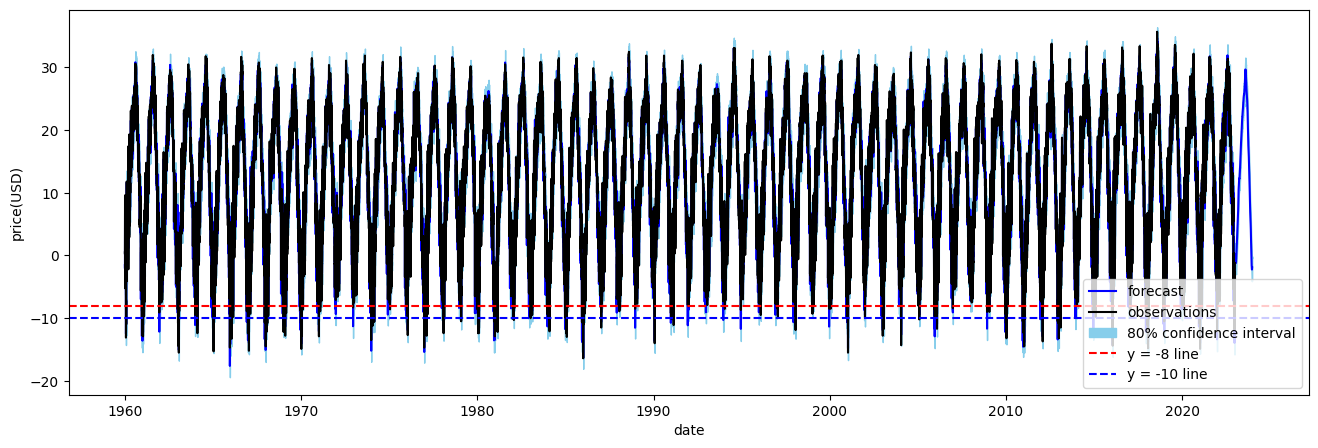

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,5))

plt.plot(forecast_data['ds'].dt.to_pydatetime(), forecast_data['yhat'], label='forecast', color='blue')
plt.plot(train_df['ds'].dt.to_pydatetime(), train_df['y'], label='observations', color='black')
plt.fill_between(forecast_data['ds'].dt.to_pydatetime(), forecast_data['yhat_upper'], forecast_data['yhat_lower'], color='skyblue', label='80% confidence interval')

# y=-10에 수평선 추가
plt.axhline(y=-8, color='red', linestyle='--', label='y = -8 line')
plt.axhline(y=-10, color='blue', linestyle='--', label='y = -10 line')
plt.legend()
plt.xlabel('date')
plt.ylabel('price(USD)')
plt.show()

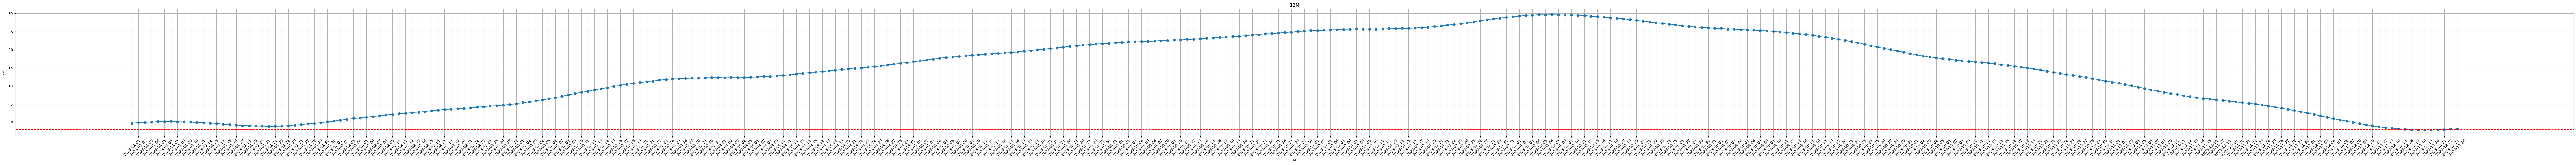

In [ ]:
sub['일시'] = sub['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(120,6))
plt.plot(sub['일시'], sub['평균기온'], marker='o')
plt.title('12M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.axhline(y=-2, color='red', linestyle='--', label='y = -2 line')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

지금까지 역대 기온들은 최소 -8에서 -10 사이에 최저점이 잡혔지만 예측값에서는 -2가 최저점이다.

Prophet의 단점이 여기서 나온다. 이게 계절성이 너무 강조되다보니까 일부 급격한 기온 하락에 대해 예측하지 못한다.

그리고 대회 평가지표가 MAE 이므로 갑자기 가격이 변하는 데이터 포인트에 매우 민감하다.

따라서 하락구간에 대한 변동성을 추가하기 위해 통계모델이 아니라 딥러닝 모델의 값으로 대체해서 기온이 급락하는 구간을 만들어야 한다.

그리고 예측값의 최저점 구간이므로 이 구간에서 -8도 이하의 변동성 구간이 등장할 가능성이 높다.

#dnn

In [ ]:
sub_final = sub

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')
sub = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/sample_submission.csv')

In [ ]:
# 날짜 데이터 변환
train['일시'] = pd.to_datetime(train['일시'])
train_df = train.set_index('일시')

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

# 일시 컬럼이 인덱스로 할당됩니다.
train_df.head()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
일시,,,,,,,,,,
1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [ ]:
train_df = train_df[train_df.index.year >= 1976]

In [ ]:
train_df = train_df.reset_index()

In [ ]:
train_df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1976-01-01,8.5,-2.0,10.5,NaN,74.0,2.4,3.9,6.29,40.6,2.7
1,1976-01-02,7.2,0.4,6.8,NaN,85.8,1.6,3.8,5.82,39.6,3.5
2,1976-01-03,8.4,-1.9,10.3,0.0,75.0,1.5,2.6,6.03,27.1,3.2
3,1976-01-04,7.8,0.3,7.5,0.7,68.8,4.0,1.4,4.70,14.6,5.0
4,1976-01-05,0.3,-6.2,6.5,0.1,58.0,5.5,7.8,7.96,81.3,-3.4
...,...,...,...,...,...,...,...,...,...,...,...
17162,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
17163,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
17164,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
17165,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [ ]:
sub

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [ ]:
data = train.filter(['평균기온'])

In [ ]:
dataset = data.values

In [ ]:
len(dataset)

23011

In [ ]:
dataset

array([[-1.6],
       [-1.9],
       [ 4. ],
       ...,
       [-2.9],
       [-1.8],
       [-1.2]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.29540918],
       [0.28942116],
       [0.40718563],
       ...,
       [0.26946108],
       [0.29141717],
       [0.30339321]])

In [ ]:
sub

,일시,평균기온
0,2023-01-01,0
1,2023-01-02,0
2,2023-01-03,0
3,2023-01-04,0
4,2023-01-05,0
...,...,...
353,2023-12-20,0
354,2023-12-21,0
355,2023-12-22,0
356,2023-12-23,0


In [ ]:
x_train = []
y_train = []

In [ ]:
358+60

418

In [ ]:
training_data_len = len(scaled_data) - 418

In [ ]:
training_data_len

22593

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

In [ ]:
train_data.shape

(22593, 1)

In [ ]:
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape[0]

22533

In [ ]:
x_train.shape

(22533, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
x_train.shape

(22533, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(Dense(100,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
import tensorflow as tf


In [ ]:
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
model

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
353/353 [==============================] - 2s 2ms/step - loss: 0.0560
Epoch 2/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0420
Epoch 3/30
353/353 [==============================] - 1s 3ms/step - loss: 0.0411
Epoch 4/30
353/353 [==============================] - 1s 3ms/step - loss: 0.0380
Epoch 5/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0405
Epoch 6/30
353/353 [==============================] - 1s 3ms/step - loss: 0.0369
Epoch 7/30
353/353 [==============================] - 1s 3ms/step - loss: 0.0371
Epoch 8/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0379
Epoch 9/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0362
Epoch 10/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0361
Epoch 11/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0356
Epoch 12/30
353/353 [==============================] - 1s 2ms/step - loss: 0.0360
Epoch 13/30
353/353 [====

In [ ]:
test_data = scaled_data[training_data_len:, :]

In [ ]:
test_data.shape

(418, 1)

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]

In [ ]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
x_test.shape

(358, 60, 1)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 2ms/step


In [ ]:
predictions.shape

(358, 1)

In [ ]:
predictions

array([[-2.70172787e+00],
       [ 2.75891483e-01],
       [-1.30510414e-02],
       [-7.57271528e-01],
       [-8.26854801e+00],
       [-6.86482620e+00],
       [-5.77966404e+00],
       [-4.63090086e+00],
       [-1.40951872e+00],
       [-3.65307975e+00],
       [-6.88833284e+00],
       [-5.44819593e+00],
       [-5.16721058e+00],
       [-4.32369280e+00],
       [-2.35166979e+00],
       [ 5.71066141e-01],
       [ 9.39274132e-01],
       [ 2.20162749e+00],
       [-4.30828393e-01],
       [-9.84184802e-01],
       [-2.53489208e+00],
       [-2.63840556e+00],
       [-2.53802776e+00],
       [-2.46796107e+00],
       [-6.32960796e-01],
       [-2.38992310e+00],
       [-3.94010139e+00],
       [-3.23694491e+00],
       [-4.47943020e+00],
       [-5.73345852e+00],
       [-3.09471822e+00],
       [-1.75791323e+00],
       [ 9.07505080e-02],
       [ 9.71616149e-01],
       [ 6.92445934e-01],
       [ 1.98652756e+00],
       [ 4.08324385e+00],
       [ 4.27367926e+00],
       [ 1.6

In [ ]:
sub['평균기온'] = predictions

In [ ]:
sub

,일시,평균기온
0,2023-01-01,-2.701728
1,2023-01-02,0.275891
2,2023-01-03,-0.013051
3,2023-01-04,-0.757272
4,2023-01-05,-8.268548
...,...,...
353,2023-12-20,-4.773738
354,2023-12-21,-4.096347
355,2023-12-22,-4.412946
356,2023-12-23,-4.334712


In [ ]:
# '일시' 컬럼을 날짜 형식으로 변환
sub['일시'] = pd.to_datetime(sub['일시'])

In [ ]:
sub_final.loc[sub_final['평균기온']<-2]

,일시,평균기온
350,2023-12-17,-2.153569
351,2023-12-18,-2.188939
352,2023-12-19,-2.236341
353,2023-12-20,-2.235357
354,2023-12-21,-2.131396
355,2023-12-22,-2.076198


In [ ]:
sub_final['일시'] = pd.to_datetime(sub_final['일시'])

In [ ]:
for i in range(16, 23):
    mask_sub = (sub['일시'].dt.month == 12) & (sub['일시'].dt.day == i)
    mask_sub_final = (sub_final['일시'].dt.month == 12) & (sub_final['일시'].dt.day == i)
    sub_final.loc[mask_sub_final, '평균기온'] = sub.loc[mask_sub, '평균기온'].values

In [ ]:
sub_final.loc[sub_final['평균기온']<-2]

,일시,평균기온
349,2023-12-16,-8.674792
350,2023-12-17,-11.003486
351,2023-12-18,-7.504386
352,2023-12-19,-5.388550
353,2023-12-20,-4.773738
354,2023-12-21,-4.096347
355,2023-12-22,-4.412946


In [ ]:
sub

,일시,평균기온
0,2023-01-01,-2.701728
1,2023-01-02,0.275891
2,2023-01-03,-0.013051
3,2023-01-04,-0.757272
4,2023-01-05,-8.268548
...,...,...
353,2023-12-20,-4.773738
354,2023-12-21,-4.096347
355,2023-12-22,-4.412946
356,2023-12-23,-4.334712


In [ ]:
sub_final.loc[sub_final['평균기온']<-2]

,일시,평균기온
349,2023-12-16,-8.674792
350,2023-12-17,-11.003486
351,2023-12-18,-7.504386
352,2023-12-19,-5.388550
353,2023-12-20,-4.773738
354,2023-12-21,-4.096347
355,2023-12-22,-4.412946


근데 마지막 딥러닝 모델 값이 통계 모델이 아니라 DNN 신경망 모델이라서 모델을 돌릴때 마다 값이 조금씩 달라지네요 ㅠㅠㅠㅠ 일단 최대한 여러번 돌려서 가장 낮은 평균 기온이 나오는걸 제출했습니다.

그리고 1월은 넣었다가 점수가 너무 낮게 나와서 12월만 했습니다.

마지막에 점수가 밀려서 모아니면 도라는 심정으로 했는데, 결과가 좋아서 운이 좋았던 것 같습니다. 감사합니다.

In [ ]:
sub_final.to_csv('./dense-base.csv', index = False)